# Keşifsel Veri Analizi (EDA)

In [152]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


from sklearn.datasets import load_digits

#veriyi eğitim ve test seti olarak ayırmak için train_test_split
#modelin parametrelerinin kombinasyonlarından en iyi sonucu bulabilme işlemi için GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV 

#verileri standardize edip ölçeklendirme için StandardScaler. farklı özelliklerin değerleri arasındaki farkı azaltıp tüm veiriy aynı ölçeğe getirir
from sklearn.preprocessing import StandardScaler, LabelEncoder
#principal component analysis (PCA), veri setindeki boyutlatı en önemli özellikleri seçerek azaltmaya yarar
from sklearn.decomposition import PCA

# support vector machine
from sklearn.svm import SVC

#birçok model tahmininin oy birliği ile karara vardığı yöntem VotingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

#verileri en yakın komşularına göre sınıflandırır
from sklearn.neighbors import KNeighborsClassifier

#modelin doğruluğunu konfüzyon matrisinde değerlendirir, display ise matrisi görselleştirme aracıdır
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [153]:
#load digits fonksiyonu el yazısı rakamlar içeren bir veri setini yükler, bu veri setini modelimizi eğitmede kullanacağız.
digits = load_digits()

# data, feature ları içerir. target ise labelları içerir. x girdileri y çıktıları temsil eder
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#veriyi standardize etmek için standart scaler nesnesi oluşturulur. bu nesne veriyi ortalama 0 standart sapması 1 olacak şekilde ölçeklendirir
scaler = StandardScaler()
#eğitim verisinin fit (uyum sağlama) işlemi yapılır ve aynı zamanda veriler dönüştürülür. verilerin ölçeklendirilmesi işlemini gerçekleştirir
X_train_scaled = scaler.fit_transform(X_train)
#test verisini sadece dönüştürür ancak eğitim verisindeki bilgiye dayalı olarak yapılır. 
# bu sayede eğitim ve test verisi aynı ölçekleme işlemin etabi tutulur
X_test_scaled = scaler.transform(X_test)

In [154]:
df = pd.read_csv("data-preprocessing.csv")

In [155]:
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# En iyi 12 özellik
selector_12 = SelectKBest(score_func=f_classif, k=20)
X_new_12 = selector_12.fit_transform(X, y)
selected_features_12 = X.columns[selector_12.get_support()]
selected20 = df[selected_features_12].copy()  # selected_features_10 sütunlarını seç
selected_features_12


Index(['Cholesterol', 'Diabetes', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Income', 'Triglycerides',
       'Sleep Hours Per Day', 'Hemisphere', 'Systolic Blood Pressure',
       'Country_Colombia', 'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_Nigeria', 'Country_South Africa', 'Country_South Korea',
       'Country_United States', 'Continent_Europe', 'Continent_North America'],
      dtype='object')

In [156]:
selected =['Age', 'Cholesterol', 'Diabetes', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Income', 'Triglycerides',
       'Sleep Hours Per Day', 'Hemisphere', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure']

In [157]:
#gereksiz değişkenleri lasso ile inceleyelim
"""
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Veriyi standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso regresyon modeli
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# Özelliklerin katsayıları
coef = pd.Series(lasso.coef_, index=X.columns)
coef_sorted = coef.sort_values(ascending=False)

"""

#bu senaryoda değişkenlerin alaka düzeyinin az olduğunu fark ettik

"\nX = df.drop('Heart Attack Risk', axis=1)\ny = df['Heart Attack Risk']\n\n# Veriyi standartlaştırma\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Lasso regresyon modeli\nlasso = Lasso(alpha=0.01)\nlasso.fit(X_scaled, y)\n\n# Özelliklerin katsayıları\ncoef = pd.Series(lasso.coef_, index=X.columns)\ncoef_sorted = coef.sort_values(ascending=False)\n\n"

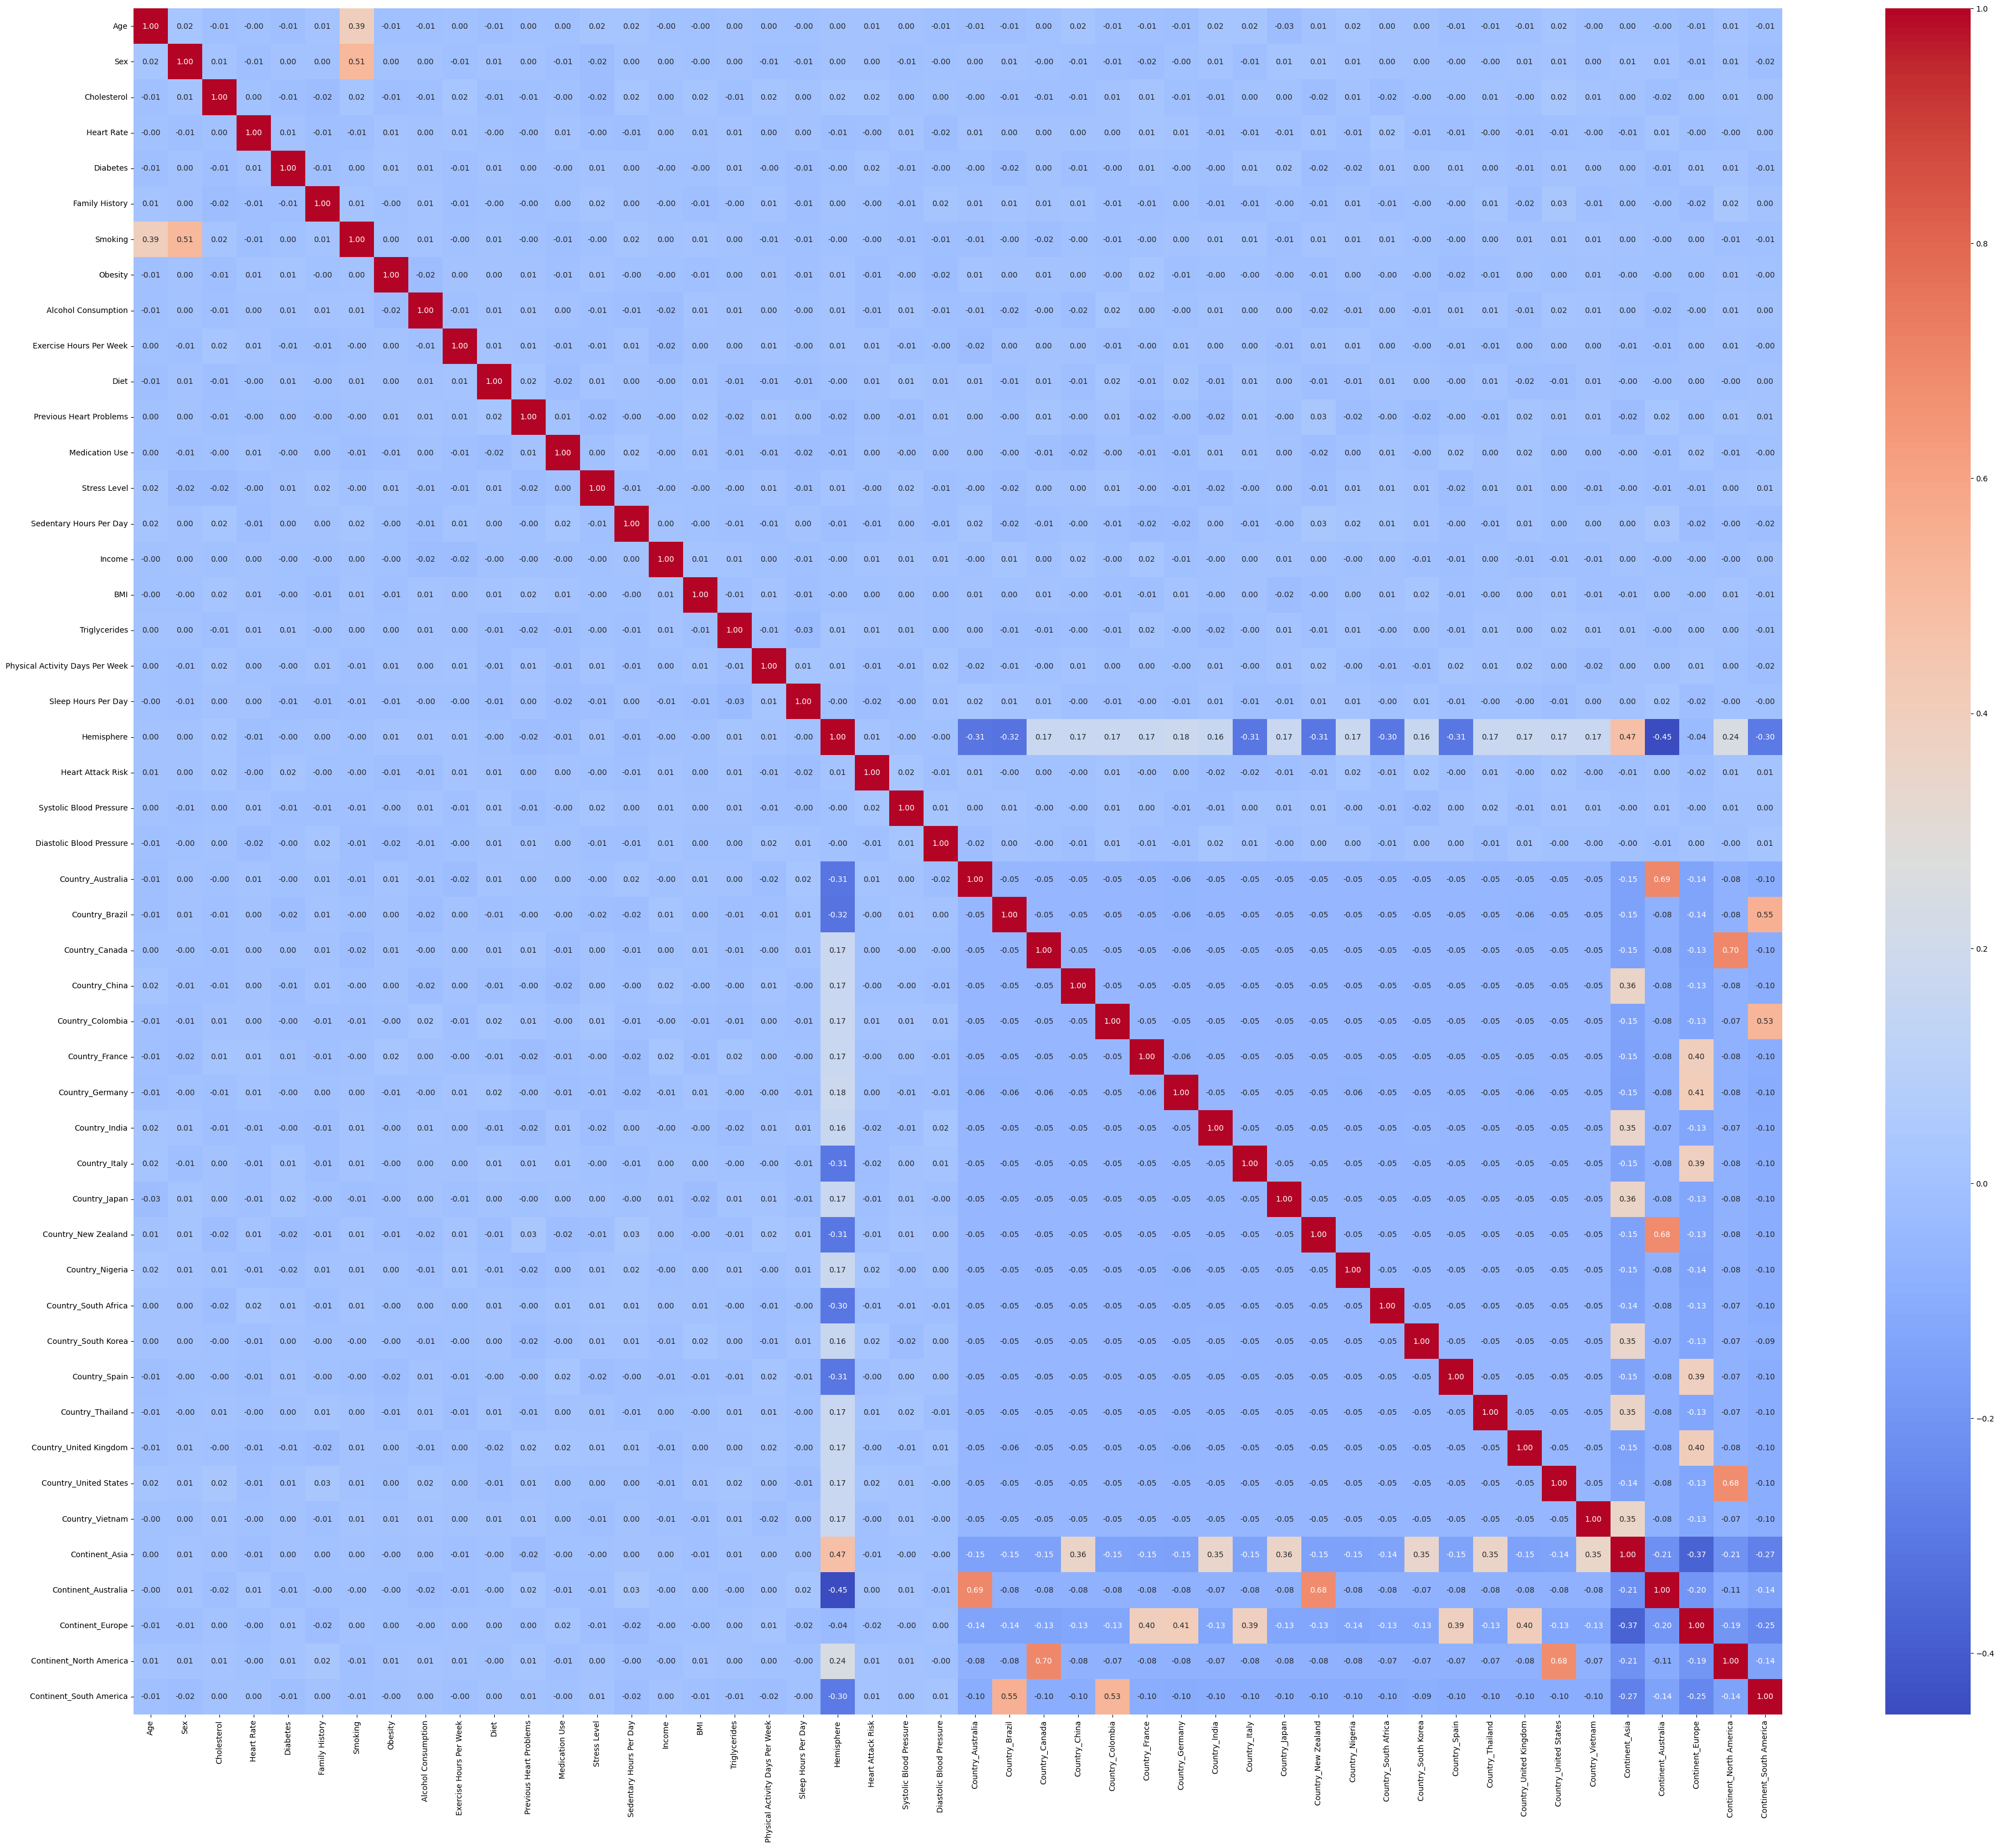

Heart Attack Risk                  1.000000
Cholesterol                        0.019340
Country_Nigeria                    0.018934
Country_South Korea                0.018608
Systolic Blood Pressure            0.018585
Country_United States              0.017327
Diabetes                           0.017225
Continent_North America            0.012751
Hemisphere                         0.012704
Exercise Hours Per Week            0.011133
Triglycerides                      0.010471
Income                             0.009628
Country_Colombia                   0.009185
Country_Thailand                   0.008487
Country_Australia                  0.007733
Continent_South America            0.007303
Age                                0.006403
Diet                               0.005908
Sex                                0.003095
Medication Use                     0.002234
Continent_Australia                0.001851
Country_Germany                    0.001189
Country_Canada                  

In [158]:
# Korelasyon matrisini oluşturalım
correlation_matrix = df.corr()

# Korelasyon haritasını görselleştirelim
plt.figure(figsize=(48, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Hedef değişken ile en yüksek korelasyona sahip özellikleri sıralama
target_correlation = correlation_matrix['Heart Attack Risk'].sort_values(ascending=False)
print(target_correlation)


Veri ölçeklendirme


In [159]:
# StandardScaler'ı uygula
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[selected])

# Veriyi DataFrame'e dönüştür
df_scaled = pd.DataFrame(df_scaled, columns=selected)

print(df_scaled.head())

        Age  Cholesterol  Diabetes   Obesity  Alcohol Consumption  \
0  0.625557    -0.641579 -1.369651 -1.002857            -1.219867   
1 -1.539322     1.596895  0.730113  0.997151             0.819762   
2 -1.539322     0.793023  0.730113 -1.002857            -1.219867   
3  1.425621     1.522691  0.730113 -1.002857             0.819762   
4  0.578495     0.718820  0.730113  0.997151            -1.219867   

   Exercise Hours Per Week    Income  Triglycerides  Sleep Hours Per Day  \
0                -1.010838  1.280130      -0.588539            -0.514750   
1                -1.418027  1.582523      -0.816487            -0.011823   
2                -1.372188  0.955917       0.756800            -1.520604   
3                -0.032188 -0.404902      -0.177339            -1.520604   
4                -0.727941  0.028445      -0.834365            -1.017677   

   Hemisphere  Systolic Blood Pressure  Diastolic Blood Pressure  
0   -1.350571                 0.870044                  0.193

In [160]:
df_scaled['Heart Attack Risk'] = df['Heart Attack Risk']  # 'Heart Attack Risk' sütununu ekle


In [161]:
df_scaled

,Age,Cholesterol,Diabetes,Obesity,Alcohol Consumption,Exercise Hours Per Week,Income,Triglycerides,Sleep Hours Per Day,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure,Heart Attack Risk
0,0.625557,-0.641579,-1.369651,-1.002857,-1.219867,-1.010838,1.280130,-0.588539,-0.514750,-1.350571,0.870044,0.193782,0
1,-1.539322,1.596895,0.730113,0.997151,0.819762,-1.418027,1.582523,-0.816487,-0.011823,0.740428,1.135714,0.534480,0
2,-1.539322,0.793023,0.730113,-1.002857,-1.219867,-1.372188,0.955917,0.756800,-1.520604,0.740428,1.477290,0.943319,0
3,1.425621,1.522691,0.730113,-1.002857,0.819762,-0.032188,-0.404902,-0.177339,-1.520604,0.740428,1.059809,1.011458,0
4,0.578495,0.718820,0.730113,0.997151,-1.219867,-0.727941,0.028445,-0.834365,-1.017677,0.740428,-1.672797,0.193782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.296119,-1.717530,0.730113,-1.002857,0.819762,-0.362578,0.957630,-1.567374,-0.011823,0.740428,-1.558939,-0.623895,0
8759,-1.209884,-1.729898,0.730113,0.997151,-1.219867,1.131536,0.739945,0.890887,0.994032,0.740428,0.832092,1.147738,0
8760,-0.315695,-0.122154,-1.369651,0.997151,0.819762,-1.187161,-1.505080,0.488626,-1.520604,-1.350571,0.983903,-0.692035,1
8761,-0.833383,-1.012597,0.730113,-1.002857,-1.219867,-1.076238,0.641423,-1.357305,0.491104,-1.350571,-0.610117,-1.237152,0


box plot analizi 

In [162]:
data_melted = pd.melt(df_scaled, id_vars='Heart Attack Risk', var_name='features', value_name='value')

<Axes: xlabel='features', ylabel='value'>

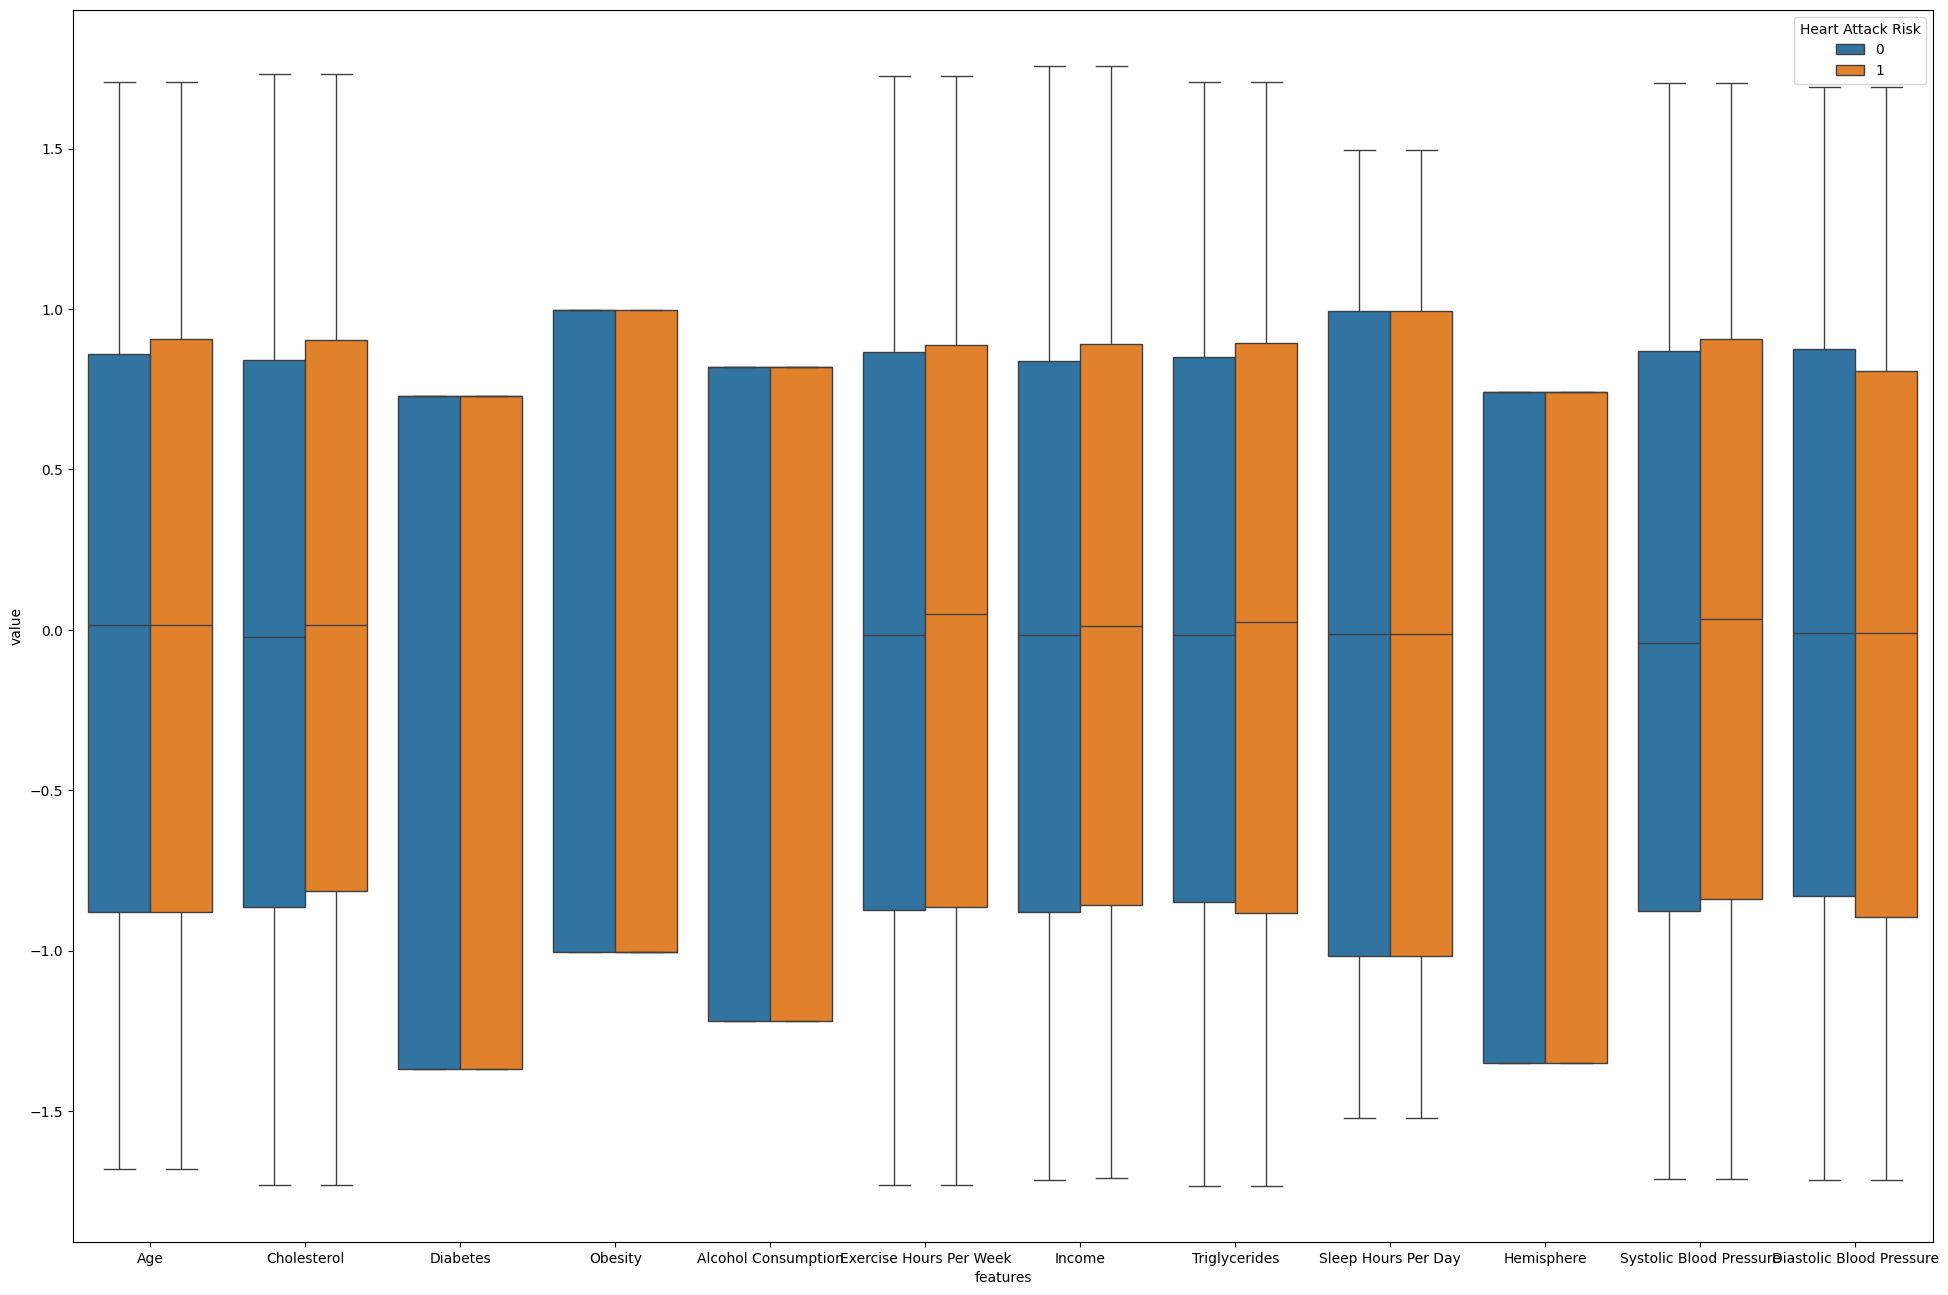

In [163]:
data_melted = pd.melt(df_scaled, id_vars='Heart Attack Risk', var_name='features', value_name='value')
plt.figure(figsize=(24,16))
sns.boxplot(x = 'features', y='value', hue='Heart Attack Risk', data= data_melted)

correlation


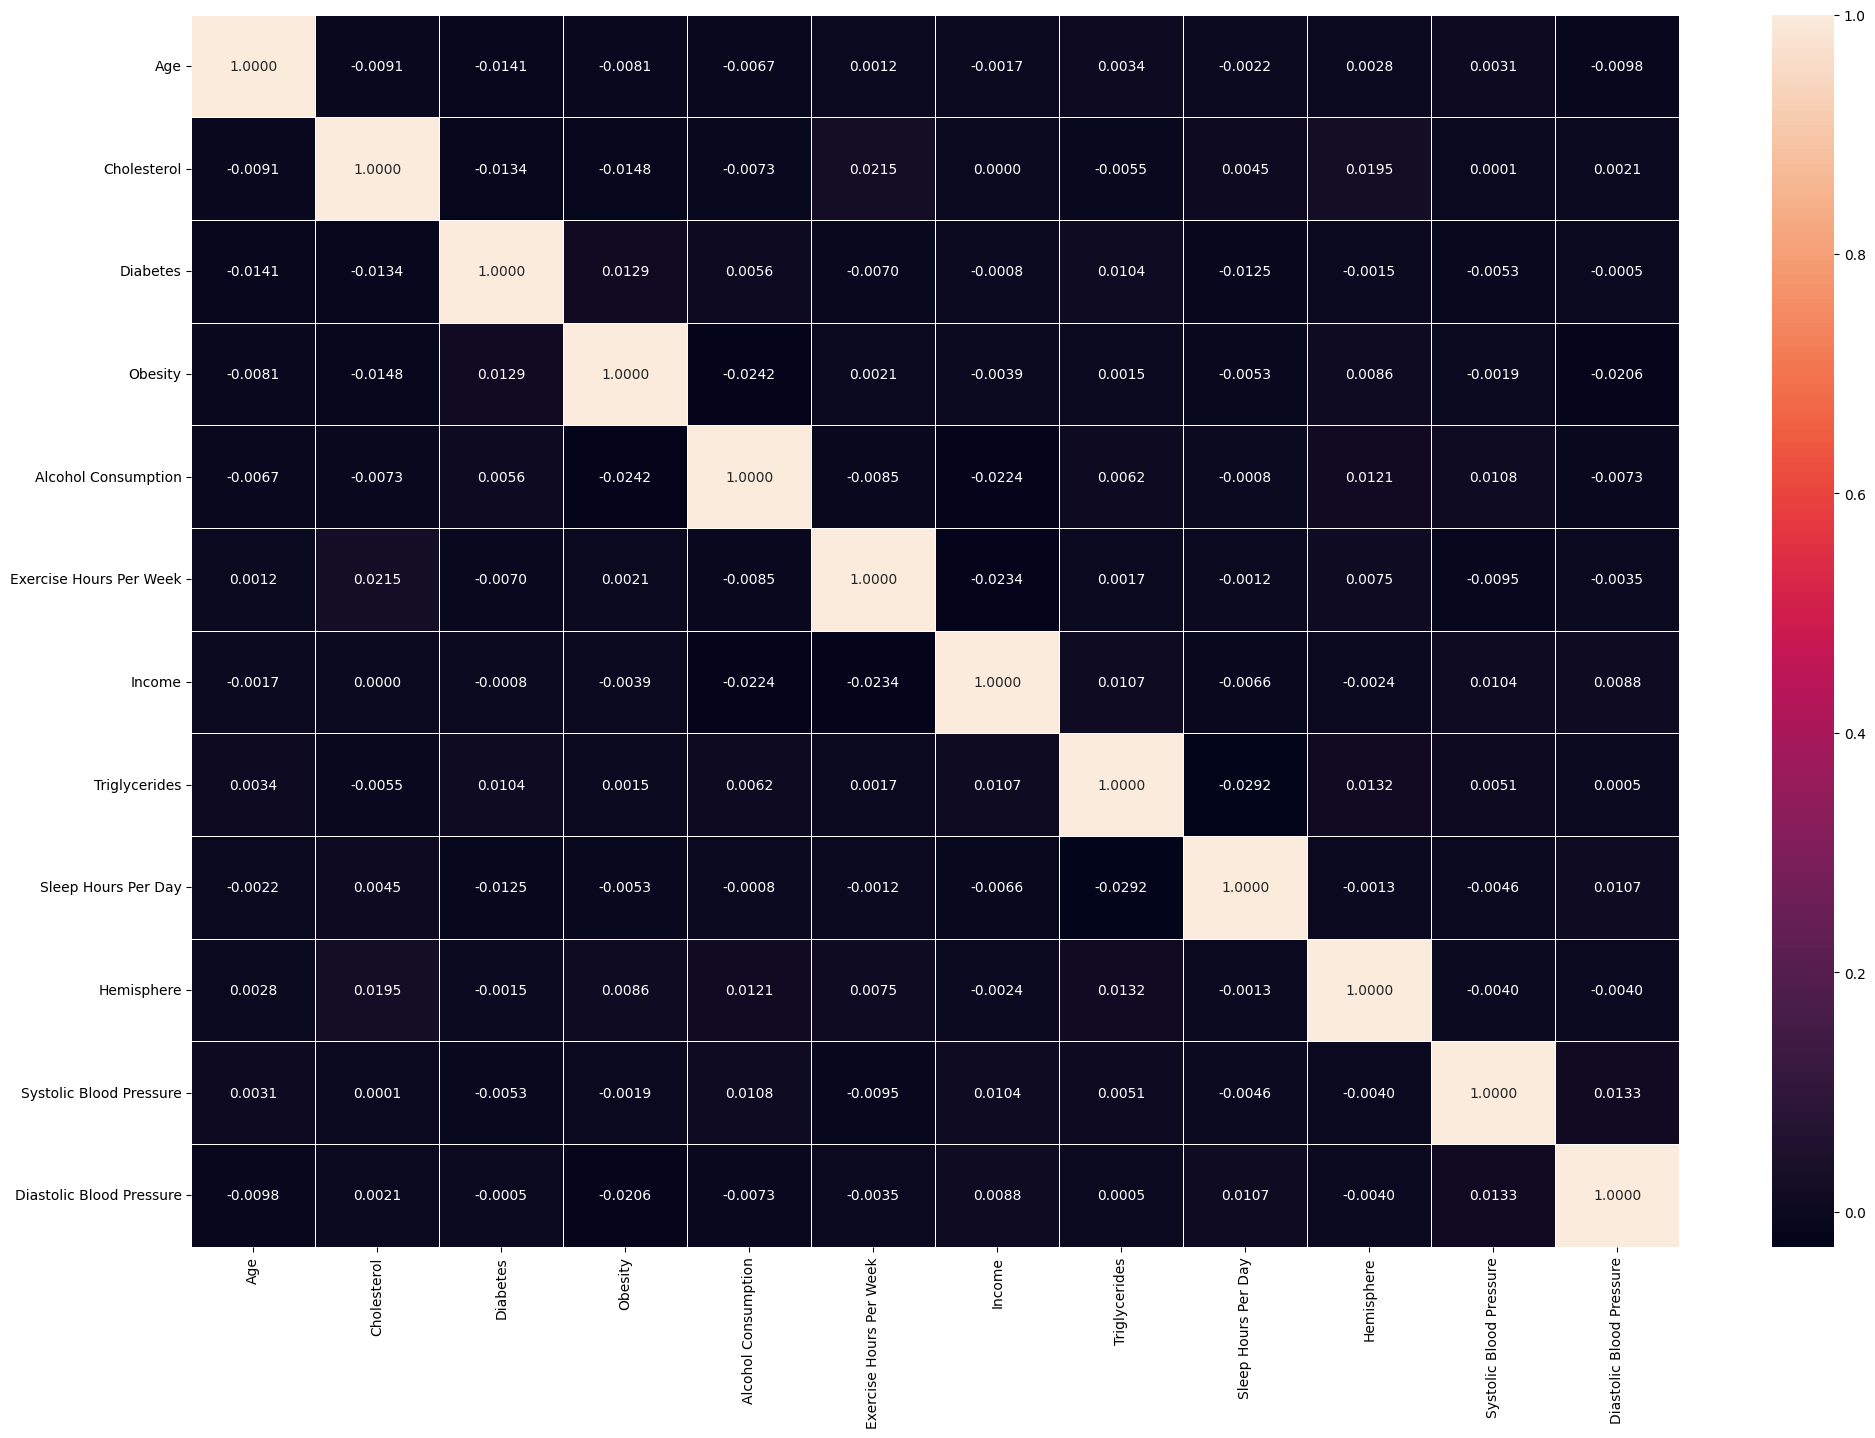

In [164]:
plt.figure(figsize=(24,16))
sns.heatmap(df[selected].corr(), annot=True, fmt=".4f", linewidths=0.7)
plt.show()

In [165]:
used_data = df[selected]
used_data['Heart Attack Risk'] = df["Heart Attack Risk"]
used_data.to_csv("used_dataset.csv", index=False)

/var/folders/sg/010p4dys4cn4m_5nl427sxpc0000gn/T/ipykernel_62337/4274582032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Heart Attack Risk'] = df["Heart Attack Risk"]
